In [1]:
%matplotlib inline
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

import h5py
import numpy as np
import pylab as plt
import sys
sys.path.append('./..')
import data as tutorial_data
file_name = tutorial_data.get_file('BYxRM')

---
## Pandas

Similar to *NumPy*, *Pandas* is one of the most widely used python libraries in data science. It provides high-performance, easy to use structures and data analysis tools. Unlike *NumPy* library which provides objects for multi-dimensional arrays, *Pandas* provides in-memory 2d table object called *Dataframe*. It is like a spreadsheet with column names and row label.  

Some commonly used data structures in pandas are:

- *Series* objects: 1D array, similar to a column in a spreadsheet
- *DataFrame* objects: 2D table, similar to a spreadsheet
- *Panel* objects: Dictionary of DataFrames, similar to sheet in MS Excel

Pandas can be imported into Python using:

In [2]:
import pandas as pd

### Pandas Series

Pandas Series object is created using *pd.Series* function. Each row is provided with an index and by defaults is assigned numerical values starting from *0*. Like *NumPy*, Pandas also provide the basic mathematical functionalities like addition, subtraction and conditional operations and broadcasting.

In [3]:
weight = pd.Series([68, 83, 112],index=["alice", "bob", "charles"])
birthyear = pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year")
children = pd.Series([0, 3], index=["charles", "bob"])
hobby = pd.Series(["Biking", "Dancing"], index=["alice", "bob"])
print(weight)
print('---')
print(weight.values)

alice       68
bob         83
charles    112
dtype: int64
---
[ 68  83 112]


For a lot of applications, a plain old *Series* is probably not a lot of use, but it is the core component of the Pandas workhorse, the *DataFrame*, so it’s useful to know about.   

The *DataFrame* represents tabular data, a bit like a spreadsheet. *DataFrames* are organised into colums (each of which is a *Series*), and each column can store a single data-type, such as floating point numbers, strings, boolean values etc. *DataFrames* can be indexed by either their row or column names. (They are similar in many ways to R’s `data.frame`.).  

We can create a *DataFrame* in *Pandas* from a Python dictionary, or by loading in a text file containing tabular data. First we are going to look at how to create one from a dictionary.


In [4]:
df = pd.DataFrame({'weight': weight, 'birthyear': birthyear, 'children': children, 'hobby': hobby})
df

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


An alternative way to create a *DataFrame* is to load it from existing files. There are various loading function to load data from different file sources which can be found [here](https://pandas.pydata.org/pandas-docs/stable/api.html#input-output). The most important ones are:
- *pd.read_pickle*: Load pickled pandas object (or any object) from file
- *pd.read_csv*: Read CSV (comma-separated) file into DataFrame
- *pd.read_json*: Convert a JSON string to pandas object
- *pd.read_excel*: Read an Excel table into a pandas DataFrame
- *pd.read_hdf*: Read from the HDF5 file (PyTables format)

Let's return now to our HDF5 file that we previously examined.
The *phenotype* group contains 3 datasets:

In [5]:
f = h5py.File(file_name, 'r')
print(list(f['phenotype'].keys()))
print(f['phenotype/col_header/phenotype_ID'])
print(f['phenotype/row_header/sample_ID'])

['col_header', 'matrix', 'row_header']
<HDF5 dataset "phenotype_ID": shape (46,), type "|S22">
<HDF5 dataset "sample_ID": shape (1008,), type "|S22">


This seems to be a phenotype matrix where the *matrix* dataset contains the 2d array with the phenotype values and the *col_header/phenotype_ID* contains the phenotype names and the *row_header/sample_ID* contains the accession ids.  
We can construct a Panda *dataframe* in the following way:

In [6]:
pheno_group = f['phenotype']
df = pd.DataFrame(pheno_group['matrix'][:], 
                        columns=np.char.decode(pheno_group['col_header']['phenotype_ID'][:]),
                        index=np.char.decode(pheno_group['row_header']['sample_ID'][:]))

**Dataframes** have some essential methods to access the data:
- **head()**: returns the top 5 rows in the dataframe object
- **tail()**: returns the bottom 5 rows in the dataframe
- **info()**: prints the summary of the dataframe
- **describe()**: gives a nice overview of the main aggregated values over each column

In [7]:
# retrieve first 10 rows
df.head(10)

,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,Diamide,E6_Berbamine,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
A01_01,-7.323520,0.279993,0.313118,1.658179,-1.604442,5.841617,-4.130950,0.821226,3.622602,-0.378747,...,1.199054,-0.309149,17.470822,0.055225,-0.184268,24.548971,0.712171,0.890842,4.118372,8.592818
A01_02,-8.098236,-0.206326,-0.534844,-0.918012,0.892198,-1.618172,1.131947,-0.764736,-2.946279,-2.475193,...,0.443182,0.697908,18.052925,0.283462,1.662201,26.808476,-1.522498,0.006062,0.066515,-4.220476
A01_03,7.605720,-0.127960,-0.311102,-2.712088,3.301709,-6.680571,-1.138056,-3.382532,-3.157866,-4.178616,...,1.472629,1.474329,18.163782,-0.951379,0.369565,26.183975,1.082289,1.723157,5.714088,-6.506519
A01_04,-6.147649,0.878392,-0.563331,-0.827358,-1.291270,2.753851,-2.268121,0.867456,-6.832079,-1.970630,...,0.054694,-0.739040,15.575856,-1.690867,-0.840344,20.893646,-0.636280,0.053258,-3.196936,0.294462
A01_05,9.379060,-1.353169,0.405204,-1.137234,4.260286,-7.391216,-3.222742,1.586376,1.048391,-3.971730,...,0.267463,0.959138,17.808444,0.127621,1.967267,28.621507,-3.720999,-0.768724,-4.002786,7.045575
A01_06,9.394562,1.655436,0.531654,-2.044903,1.577325,-5.769939,1.355905,2.336068,4.038331,-2.917101,...,0.591233,-0.134019,16.085601,-0.100294,0.710547,23.549116,-2.680231,2.025716,-0.889829,-4.108786
A01_07,-7.229972,-1.423605,-0.007546,-1.714243,0.954948,2.111495,0.590067,1.415252,-4.861309,-4.082216,...,-0.330839,0.294128,16.472448,-0.612281,-0.242591,23.901629,-1.834152,-3.487390,3.618048,-0.035142
A01_08,-7.585476,1.750342,0.941181,0.306306,-2.997501,0.063007,-4.352137,2.634605,3.147146,8.292883,...,0.043294,-0.826648,16.210856,NaN,-0.538390,23.595423,-1.449024,1.679693,-2.227455,-5.773160
A01_09,-7.890982,-0.559696,-1.396937,-0.879233,-1.044798,-6.214873,0.211404,-0.006420,-9.470146,-4.480685,...,-0.048497,-0.483113,15.161760,-0.035535,-0.398174,22.693341,-1.580512,-1.320567,-4.863302,9.024782
A01_10,-8.144131,-2.787328,-1.111711,-0.239611,-2.933533,1.231604,1.397043,2.405056,8.532335,14.355684,...,0.685319,-0.594544,16.388451,-0.742849,-0.427930,23.697733,-2.967864,-1.553708,-5.314155,-1.229565


In [8]:
# retrieve last 5 rows
df.tail()

,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,Diamide,E6_Berbamine,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
A11_92,-4.262720,-0.893290,-0.329504,0.257061,-3.120957,2.556543,2.567092,2.054232,1.672347,5.465978,...,0.232614,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154
A11_93,-10.147285,1.145573,0.048948,-1.089350,0.539833,2.720952,-3.445357,0.891066,3.003684,-1.667592,...,-0.317916,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492
A11_94,NaN,0.321844,NaN,1.016712,1.801923,-4.157083,-0.097598,-1.954080,-1.739499,-6.520551,...,-1.698334,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069
A11_95,NaN,-1.001507,NaN,0.004191,4.675717,-10.240998,1.244410,-0.810857,2.305318,9.321186,...,0.259829,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961
A11_96,NaN,NaN,NaN,NaN,-0.155556,NaN,2.603438,-0.026752,NaN,NaN,...,NaN,1.776737,17.924399,-0.165314,NaN,NaN,1.553372,NaN,NaN,NaN


In [9]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, A01_01 to A11_96
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cadmium_Chloride        799 non-null    float64
 1   Caffeine                1004 non-null   float64
 2   Calcium_Chloride        949 non-null    float64
 3   Cisplatin               990 non-null    float64
 4   Cobalt_Chloride         1007 non-null   float64
 5   Congo_red               979 non-null    float64
 6   Copper                  972 non-null    float64
 7   Cycloheximide           1004 non-null   float64
 8   Diamide                 1003 non-null   float64
 9   E6_Berbamine            1005 non-null   float64
 10  Ethanol                 967 non-null    float64
 11  Formamide               999 non-null    float64
 12  Galactose               962 non-null    float64
 13  Hydrogen_Peroxide       769 non-null    float64
 14  Hydroquinone            960 non-null  

In [10]:
# calculate some summary statistics
df.describe()

,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,Diamide,E6_Berbamine,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
count,799.000000,1004.000000,949.000000,990.000000,1007.000000,979.000000,972.000000,1004.000000,1003.000000,1005.000000,...,1001.000000,1003.000000,1006.000000,979.000000,887.000000,1006.000000,1005.000000,1003.000000,806.000000,957.000000
mean,-0.235763,0.056543,0.012039,-0.080343,-0.021220,-0.580926,0.067722,0.157040,0.139683,0.264369,...,0.112644,0.060641,16.315382,0.007996,0.007482,23.502212,0.047823,-0.140778,-0.190777,0.166791
std,6.306318,0.910155,0.773159,1.045181,2.808820,6.411729,1.808578,1.683631,4.749402,7.083140,...,0.853002,0.939542,1.034526,0.674851,0.902919,1.815418,2.541834,2.642301,4.649077,6.433438
min,-10.381891,-4.141899,-2.452206,-4.557306,-6.184913,-13.488314,-8.944908,-5.980597,-17.291493,-12.513969,...,-3.327925,-2.911638,11.981303,-2.570029,-3.724701,16.979292,-6.493270,-7.377041,-9.588223,-13.359268
25%,-6.456470,-0.507907,-0.498740,-0.741802,-2.288283,-6.620026,-0.665649,-0.963134,-3.193845,-4.880492,...,-0.449021,-0.599287,15.661717,-0.451187,-0.571156,22.380371,-1.879136,-2.168742,-3.680280,-5.159223
50%,1.022356,0.067418,0.042018,-0.019068,-0.377311,-0.568692,0.396090,0.234640,0.892107,-2.475193,...,0.146145,0.047475,16.358272,0.024450,-0.003055,23.403000,-0.132709,-0.047865,-0.977779,-2.015229
75%,5.813172,0.622523,0.503318,0.645479,1.998527,4.537839,1.235156,1.324370,3.327036,4.487006,...,0.700031,0.717306,17.006638,0.479301,0.628253,24.629824,1.832583,1.966580,2.605938,5.751830
max,12.876948,3.372236,2.689781,3.763224,8.467436,15.984204,4.924384,6.516210,11.349569,23.116821,...,2.816535,3.286086,19.067704,1.773026,2.956204,29.985755,7.287769,7.474741,15.552609,16.662919


### Accessing data in a DataFrame

Our columns in the dataframe object are individual Series of data. We can access them by referring to the column name e.g. dataframe['column-name']. For example to access the *Caffeine* column run this:

In [11]:
print(df['Caffeine'].head())
print('============= or ===========')
print(df.Caffeine.head())

A01_01    0.279993
A01_02   -0.206326
A01_03   -0.127960
A01_04    0.878392
A01_05   -1.353169
Name: Caffeine, dtype: float64
============= or ===========
A01_01    0.279993
A01_02   -0.206326
A01_03   -0.127960
A01_04    0.878392
A01_05   -1.353169
Name: Caffeine, dtype: float64


To filter by row we have to use the *iloc* or *loc* function on the *dataframe*. The *iloc* function allows to filter by the integer index of the row while the *loc* function allows to index by the index label (accession id):

In [12]:
df.iloc[2].Caffeine

-0.127959825210201

In [13]:
df.loc['A01_03'].Caffeine

-0.127959825210201

It is also possible to retrieve multiple rows either by specifying the exact row index labels or integer positions:

In [14]:
df.iloc[[1, 5, 6, 9]].Caffeine

A01_02   -0.206326
A01_06    1.655436
A01_07   -1.423605
A01_10   -2.787328
Name: Caffeine, dtype: float64

In [15]:
df.loc[['A01_02', 'A01_06', 'A01_07', 'A01_10']].Caffeine

A01_02   -0.206326
A01_06    1.655436
A01_07   -1.423605
A01_10   -2.787328
Name: Caffeine, dtype: float64

In [16]:
# retrieve the first 10 rows for the columns Caffeine (column 1 ) and Cisplatin (column 2)
df.iloc[:10,[1,3]]

,Caffeine,Cisplatin
A01_01,0.279993,1.658179
A01_02,-0.206326,-0.918012
A01_03,-0.127960,-2.712088
A01_04,0.878392,-0.827358
A01_05,-1.353169,-1.137234
A01_06,1.655436,-2.044903
A01_07,-1.423605,-1.714243
A01_08,1.750342,0.306306
A01_09,-0.559696,-0.879233
A01_10,-2.787328,-0.239611


### Filtering data

We can also apply conditions to the data we are inspecting, such as to filter our data.
Let's examine the Caffeine column and check the lowest value.

In [17]:
df.Caffeine.min()

-4.14189858085831

Let's now filter the Caffeine column for values that are greater than 0 

In [18]:
df.Caffeine > 0

A01_01     True
A01_02    False
A01_03    False
A01_04     True
A01_05    False
          ...  
A11_92    False
A11_93     True
A11_94     True
A11_95    False
A11_96    False
Name: Caffeine, Length: 1008, dtype: bool

This returns a new *Series* of *True*/*False* values though. To actually filter the data, we need to use this *Series* to mask our original *DataFrame*

In [19]:
df[df.Caffeine > 0]

,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,Diamide,E6_Berbamine,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
A01_01,-7.323520,0.279993,0.313118,1.658179,-1.604442,5.841617,-4.130950,0.821226,3.622602,-0.378747,...,1.199054,-0.309149,17.470822,0.055225,-0.184268,24.548971,0.712171,0.890842,4.118372,8.592818
A01_04,-6.147649,0.878392,-0.563331,-0.827358,-1.291270,2.753851,-2.268121,0.867456,-6.832079,-1.970630,...,0.054694,-0.739040,15.575856,-1.690867,-0.840344,20.893646,-0.636280,0.053258,-3.196936,0.294462
A01_06,9.394562,1.655436,0.531654,-2.044903,1.577325,-5.769939,1.355905,2.336068,4.038331,-2.917101,...,0.591233,-0.134019,16.085601,-0.100294,0.710547,23.549116,-2.680231,2.025716,-0.889829,-4.108786
A01_08,-7.585476,1.750342,0.941181,0.306306,-2.997501,0.063007,-4.352137,2.634605,3.147146,8.292883,...,0.043294,-0.826648,16.210856,NaN,-0.538390,23.595423,-1.449024,1.679693,-2.227455,-5.773160
A01_13,6.099126,1.193630,-0.460481,-2.254822,-1.737934,-6.773013,1.847423,1.492433,5.377797,-2.763472,...,0.428124,-0.447422,15.707533,1.328875,-0.676125,22.880547,-4.488093,3.399301,-5.313911,-4.854207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A11_89,-0.781114,1.079321,0.219939,0.771153,1.955114,5.559785,4.924384,2.472066,2.813091,14.695409,...,-0.372606,0.096194,16.820080,0.619160,NaN,24.101895,3.574523,2.409968,4.127189,15.004739
A11_90,NaN,0.645842,NaN,NaN,-0.890742,13.016383,-5.268835,-0.468322,2.211619,-4.457251,...,0.058875,-1.051974,17.411414,-0.035335,NaN,25.180528,-1.240811,3.017025,-2.024357,-5.818075
A11_91,-6.343767,0.438523,-0.322617,1.973411,4.515720,-8.495414,NaN,-0.224670,3.258043,2.732642,...,0.114539,1.206215,16.871327,1.084758,NaN,22.730956,4.994928,-2.030958,-0.282208,8.456099
A11_93,-10.147285,1.145573,0.048948,-1.089350,0.539833,2.720952,-3.445357,0.891066,3.003684,-1.667592,...,-0.317916,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492


To check that there are no values below 0 run the *min()* function again

In [20]:
df[df.Caffeine > 0].Caffeine.min()

0.0032293928665531

Some of our values have missing values that are represented in the output as `NaN`. Often we can't work with them. One way to deal with them is to drop the rows that contain them. First let's check how many missing values we have.

In [21]:
print(df.Caffeine[df.Caffeine.isnull()])

A05_12   NaN
A09_65   NaN
A10_01   NaN
A11_96   NaN
Name: Caffeine, dtype: float64


In [22]:
df.dropna(subset=['Caffeine'], inplace=True)
print(df.Caffeine[df.Caffeine.isnull()])

Series([], Name: Caffeine, dtype: float64)


### Plotting pandas dataframes

The *DataFrame* has a built in plotting functions (i.e `pd.hist()` or `pd.plot()`) that allows to create simple plots using matplotlib internally. For more advanced plotting functions, one can use the *matplotlib* library directly.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ca4a5ccf8>,
      dtype=object)

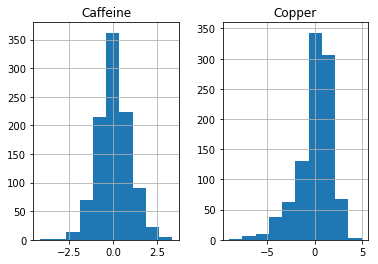

In [23]:
df[['Caffeine','Copper']].hist()

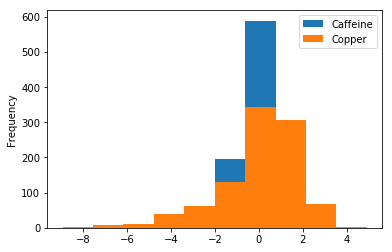

In [24]:
df[['Caffeine','Copper']].plot(kind='hist')

### Plotting with matplotlib

We don't have to rely on pandas plotting functionality but can also use matplot lib to visualize our phenotype data.  Let’s have a look at the relationship between two phenotypes in our dataframe. To save typing later on, we can extract the Series for “Caffeine” and “Copper” by assigning each to a new variable, x and y, respectively.

In [25]:
df.dropna(inplace=True)
x = df.Sorbitol
y = df.Trehalose

Then we can plot them as a scatter chart by adding:

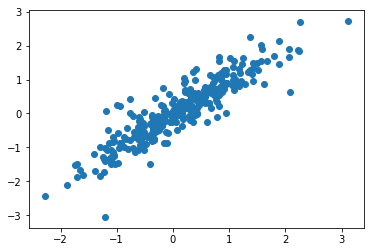

In [26]:
plt.scatter(x, y)
# or plt.savefig("name.png")

Now we are going to do some basic statistics so we can plot a line of linear regression on our chart.  
Let’s plot a linear regression through the data. Python has a library called scipy that contains a lot of statistics routines. We can import it:

In [27]:
from scipy.stats import linregress

To get the statistics for the linear regression we can use a function called `linregress`

In [28]:
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
stats

LinregressResult(slope=0.9622331502773507, intercept=-0.011936070484259736, rvalue=0.9064525118355159, pvalue=1.0446912214962477e-114, stderr=0.025839319479636295)

The equation for the straight line that describes linear regression is `y = mx + b`, where m is the *slope* and `b` is the *intercept*.  
(Hint: you have some extra information in the stats object - stats.rvalue and stats.pvalue.)

Therefore, we can then plot the line of linear regression by adding the following line:

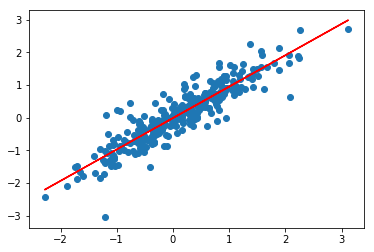

In [29]:
plt.scatter(x, y)
plt.plot(x, m * x + b, color="r")   # I've added a color argument here

Matplotlib figures are highly customisable, and there are so many options it is usually best to consult the [documentation]() first.  
We will take the above plot and customize *fontsize*, *linewidth*, *color* for example:

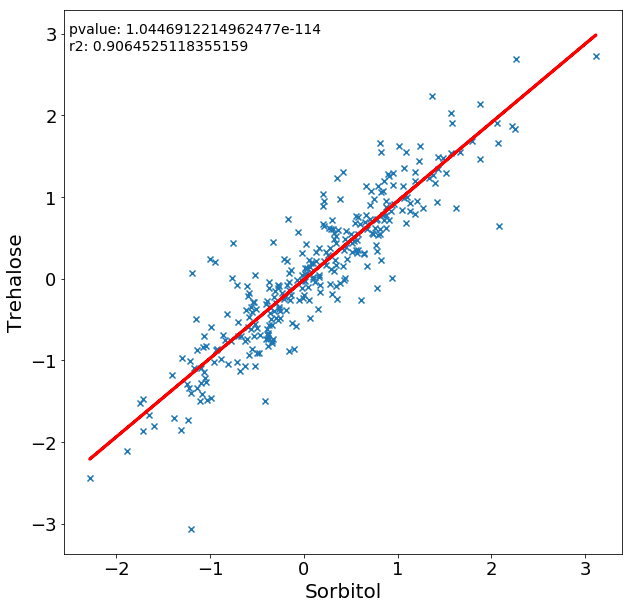

In [30]:
# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("Sorbitol", fontsize=20)
plt.ylabel("Trehalose", fontsize=20)

# Plot pvalue and r2 value
plt.text(-2.5, 3, 'pvalue: %s' % stats.pvalue,
         fontsize=14)
plt.text(-2.5, 2.8, 'r2: %s' % stats.rvalue,
         fontsize=14)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## Exercises

You can find more pandas excercices [here](https://github.com/guipsamora/pandas_exercises) and [here](https://www.machinelearningplus.com/python/101-pandas-exercises-python/)